In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("CO2_Prediction_After_Wrangling.csv")

In [3]:
print(df.columns)

Index(['Data Year', 'Plant state abbreviation', 'Utility name', 'Plant name',
       'Plant-level sector', 'Balancing Authority Name',
       'eGRID subregion name', 'Plant latitude', 'Plant longitude',
       'Number of units', 'Number of generators', 'Plant primary fuel',
       'Plant primary coal/oil/gas/ other fossil fuel category',
       'Flag indicating if the plant burned or generated any amount of coal',
       'Plant capacity factor', 'Plant nameplate capacity (MW)',
       'Nonbaseload Factor', 'Plant annual net generation (MWh)',
       'Plant annual CO2 emissions (tons)', 'Plant annual CH4 emissions (lbs)',
       'Plant annual CO2 total output emission rate (lb/MWh)',
       'Plant annual CH4 total output emission rate (lb/MWh)',
       'Plant unadjusted annual heat input from combustion (MMBtu)',
       'Plant nominal heat rate (Btu/kWh)',
       'Plant annual total nonrenewables net generation (MWh)',
       'Plant annual total renewables net generation (MWh)',
       

# Energy Dataset

I am going to choose the energy dataset after wrangling that I completed in my Capstone to analyze this topic further.

# Audience

My audience will be the non-technical audience or the general public.

In [4]:
df['Plant primary fuel'].value_counts()

SUN    2719
NG     1708
WAT    1448
WND    1103
DFO     766
LFG     345
SUB     136
BIT     125
WDS     120
OBG      85
BLQ      74
MSW      67
MWH      66
GEO      64
NUC      61
RC       43
WH       32
RFO      21
WC       18
PRG      17
OG       17
LIG      15
PC       13
KER      12
AB        9
PUR       7
COG       7
OTH       5
WO        5
OBS       4
OBL       3
WDL       3
BFG       2
JF        2
SGC       1
Name: Plant primary fuel, dtype: int64

In [5]:
df['Plant-level sector'].value_counts()

IPP Non-CHP           4918
Electric Utility      2949
Industrial CHP         417
Commercial Non-CHP     275
IPP CHP                212
Commercial CHP         210
Industrial Non-CHP     142
Name: Plant-level sector, dtype: int64

In [6]:
df['Plant primary coal/oil/gas/ other fossil fuel category'].value_counts()

SOLAR         2719
GAS           1708
HYDRO         1448
WIND          1103
OIL            819
BIOMASS        710
COAL           345
OTHF           127
GEOTHERMAL      64
NUCLEAR         61
OFSL            19
Name: Plant primary coal/oil/gas/ other fossil fuel category, dtype: int64

In [7]:
MWsSources = df.groupby('Plant primary coal/oil/gas/ other fossil fuel category')['Plant annual net generation (MWh)'].sum().sort_values(ascending=False)

print(MWsSources)

Plant primary coal/oil/gas/ other fossil fuel category
GAS           1.391927e+09
COAL          1.199055e+09
NUCLEAR       8.131580e+08
HYDRO         2.863718e+08
WIND          2.724804e+08
BIOMASS       6.998091e+07
SOLAR         6.300083e+07
OIL           2.060618e+07
GEOTHERMAL    1.587436e+07
OTHF          1.382021e+07
OFSL          1.211483e+07
Name: Plant annual net generation (MWh), dtype: float64


In [8]:
Solar = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=="SOLAR"]

In [9]:
Solar.groupby('Plant state abbreviation')['Plant annual net generation (MWh)'].sum().sort_values(ascending=False)

Plant state abbreviation
CA    2.651931e+07
NC    6.050031e+06
AZ    5.178057e+06
NV    4.666207e+06
TX    3.205444e+06
FL    2.302240e+06
UT    2.223706e+06
GA    1.993346e+06
NM    1.345681e+06
CO    1.062352e+06
MN    1.042021e+06
MA    9.407250e+05
NJ    9.262770e+05
VA    7.630720e+05
OR    5.716960e+05
ID    5.559640e+05
SC    5.104930e+05
MD    3.911300e+05
AL    3.572030e+05
MS    3.258530e+05
NY    2.950160e+05
IN    2.907170e+05
AR    2.034130e+05
HI    1.842240e+05
TN    1.675940e+05
OH    1.179570e+05
MI    1.159810e+05
VT    1.025350e+05
CT    1.013340e+05
MO    8.654700e+04
PA    6.247500e+04
OK    5.720300e+04
IL    5.166300e+04
DE    4.978900e+04
WI    3.577300e+04
MT    3.401200e+04
RI    2.886600e+04
NE    2.711200e+04
KY    2.240600e+04
ME    1.203200e+04
IA    1.042600e+04
KS    7.727000e+03
SD    1.672000e+03
LA    1.518000e+03
WA    1.207000e+03
WY    8.240000e+02
Name: Plant annual net generation (MWh), dtype: float64

In [10]:
Solar.groupby('Utility name')['Plant annual net generation (MWh)'].sum().sort_values(ascending=False)

Utility name
Southern Power Co                       5539454.999
Consolidated Edison Development Inc.    5112295.001
Dominion Renewable Energy               3220662.000
Sustainable Power Group, LLC            2355573.000
Florida Power & Light Co                1836740.000
                                           ...     
BWC Wareham River, LLC                        0.000
AVS Phase 2 LLC                               0.000
USS Norelius Solar LLC                        0.000
AES LAWAI SOLAR, LLC                          0.000
BWC Gibbs Brook, LLC                          0.000
Name: Plant annual net generation (MWh), Length: 1266, dtype: float64

In [11]:
Solar['Utility name'].value_counts()

Cypress Creek Renewables                177
Sustainable Power Group, LLC             88
Tesla Inc.                               70
Consolidated Edison Development Inc.     50
WGL Energy Systems, Inc                  46
                                       ... 
Ameresco, Inc - Braintree                 1
Suncore Photovoltaics, Inc                1
Kearsarge Concord II LLC                  1
PGC Plano I, LLC                          1
Dublin Solar I, LLC                       1
Name: Utility name, Length: 1266, dtype: int64

# Narrative:

What was the state of energy in 2018?  Is solar poised to make a major breakthrough in coming years?  Which states are utilizing the most solar?   How can we get a sense of where the industry is going by looking at current values.  

In [12]:
cats = df['Plant primary coal/oil/gas/ other fossil fuel category'].unique()

In [13]:
df.groupby('Plant primary coal/oil/gas/ other fossil fuel category')['Plant annual net generation (MWh)'].sum()['SOLAR']

63000834.400000006

In [14]:
len(cats)

11

In [15]:
MWbyType = [df.groupby('Plant primary coal/oil/gas/ other fossil fuel category')['Plant annual net generation (MWh)'].sum()[i] for i in df['Plant primary coal/oil/gas/ other fossil fuel category'].unique()]

In [16]:
print(MWbyType)

[20606184.223000027, 286371780.6020002, 1391926995.9519987, 1199055433.499, 13820208.208999999, 272480370.002, 69980908.95599999, 63000834.400000006, 813157993.0009999, 15874361.998, 12114832.824]


# What is the current energy mix in the United States?

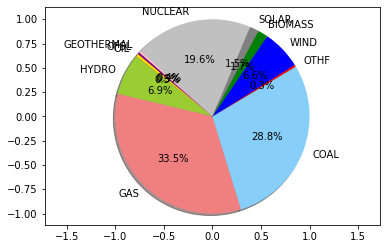

In [17]:
import matplotlib.pyplot as plt

# Data to plot
labels = cats
sizes = MWbyType
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'blue','green','grey','silver','pink','purple']

# Plot

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, frame = True)

plt.axis('equal')
plt.show()

# What are the top 10 highest consuming states for Solar Power?

In [18]:
SolarTop10 = Solar.groupby('Plant state abbreviation')['Plant annual net generation (MWh)'].sum().sort_values(ascending=False).nlargest(10)

<AxesSubplot:xlabel='Plant state abbreviation'>

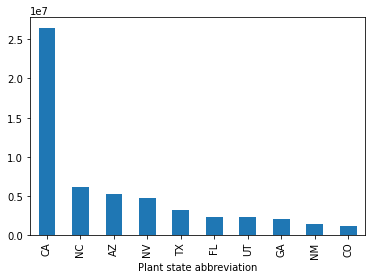

In [19]:
SolarTop10.plot.bar()

# What types of plants are most common in the US?



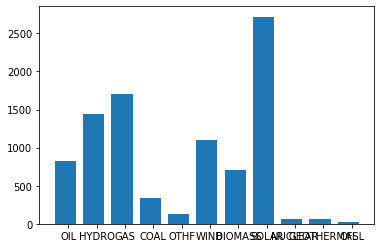

In [20]:
from collections import Counter
import numpy as np

Counter(df['Plant primary coal/oil/gas/ other fossil fuel category'])

labels, values = zip(*Counter(df['Plant primary coal/oil/gas/ other fossil fuel category']).items())

indexes = np.arange(len(labels))
width = .75

plt.bar(indexes, values, width, linewidth = .15)
plt.xticks(indexes + width * 0.15, labels)
plt.show()


# Which of the top 20 Utilities currently have the highest proportion of renewables?

It is clear that there has been a lot of investment in Solar, but this dataset gives me no understanding of how the industry is changing over time.  This would be the next thing to explore here.  

In [21]:
renewable = pd.pivot_table(df, values = ['Plant annual total renewables net generation (MWh)', 'Plant annual net generation (MWh)'], index = 'Utility name', aggfunc = 'sum')

In [22]:
renewable['% Renewable'] = renewable['Plant annual total renewables net generation (MWh)'] / renewable['Plant annual net generation (MWh)']

In [23]:
renewable.head()

,Plant annual net generation (MWh),Plant annual total renewables net generation (MWh),% Renewable
Utility name,,,
126 Grove Solar LLC,2195.0,2195.0,1.0
158th Fighter Wing,1409.0,1409.0,1.0
"180 Raritan Energy Solutions, LLC",2386.0,2386.0,1.0
"2016 ESA Project Company, LLC",0.0,0.0,NaN
"301 Chestnut Solar NG, LLC",2256.0,2256.0,1.0


In [24]:
top20 = renewable.groupby('Utility name')['Plant annual net generation (MWh)','% Renewable'].sum().sort_values(by = 'Plant annual net generation (MWh)', ascending=False).nlargest(20, columns = 'Plant annual net generation (MWh)')

/home/jeremy/Springboard/SpringBoard_Projects/StoryTelling/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Utility name'>

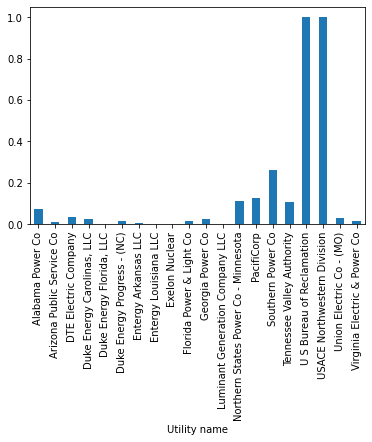

In [25]:
dfnew = top20.groupby('Utility name')['% Renewable'].sum()

dfnew.plot.bar()